In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import os
import urllib
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
download_dir = "C:\MyData\MyData\data science\datasets"

download_url = "https://raw.githubusercontent.com/aravind9722/datasets-for-ML-projects/main/cardekho_dataset.csv"

os.makedirs(download_dir,exist_ok=True)

filename = os.path.basename(download_url)

download_file_path = os.path.join(download_dir, filename)

urllib.request.urlretrieve(download_url, download_file_path)

df = pd.read_csv(download_file_path, index_col=[0])

In [3]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
df.tail()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
19543,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


In [6]:
df.shape

(15411, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


In [8]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [9]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [23]:
numeric_features = [col for col in df.columns if df[col].dtype!='O']
categorical_features = [col for col in df.columns if df[col].dtype=='O']

print("We have {} Numerical features: {}".format(len(numeric_features),numeric_features))
print("\nWe have {} Categorical features: {}".format(len(categorical_features),categorical_features))

We have 7 Numerical features: ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

We have 6 Categorical features: ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


# Univariate Analysis

# Numeric Features

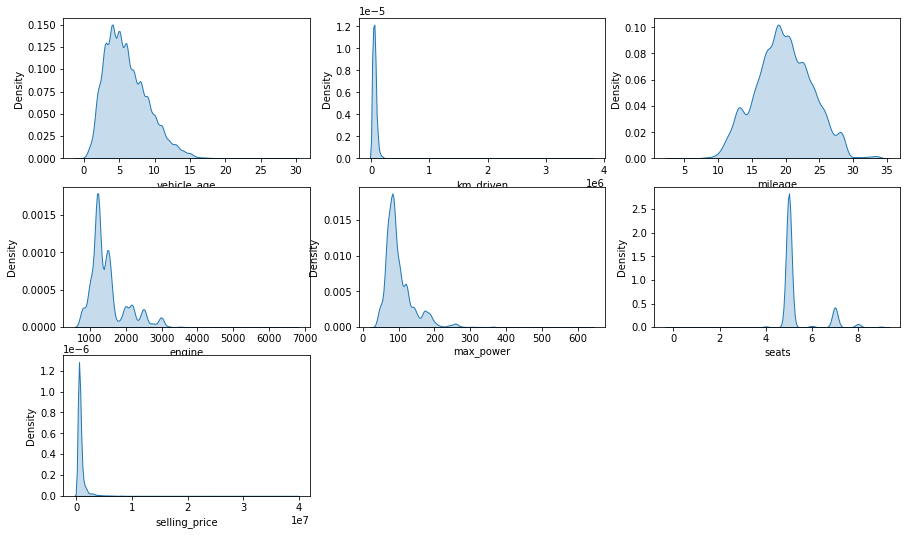

In [32]:
plt.figure(figsize=(15,15))
for i in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(df[numeric_features[i]],shade=True)
    plt.xlabel(numeric_features[i])

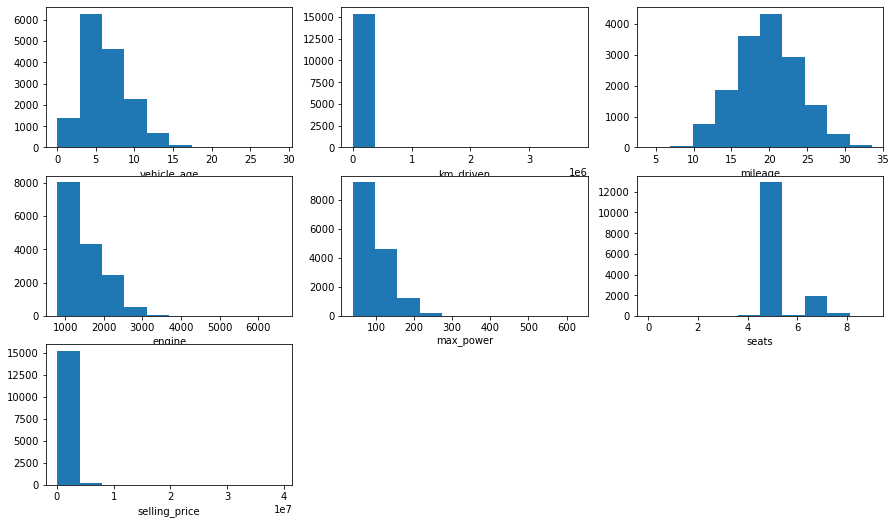

In [56]:
plt.figure(figsize=(15,15))
for i in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    plt.hist(df[numeric_features[i]])
    plt.xlabel(numeric_features[i])

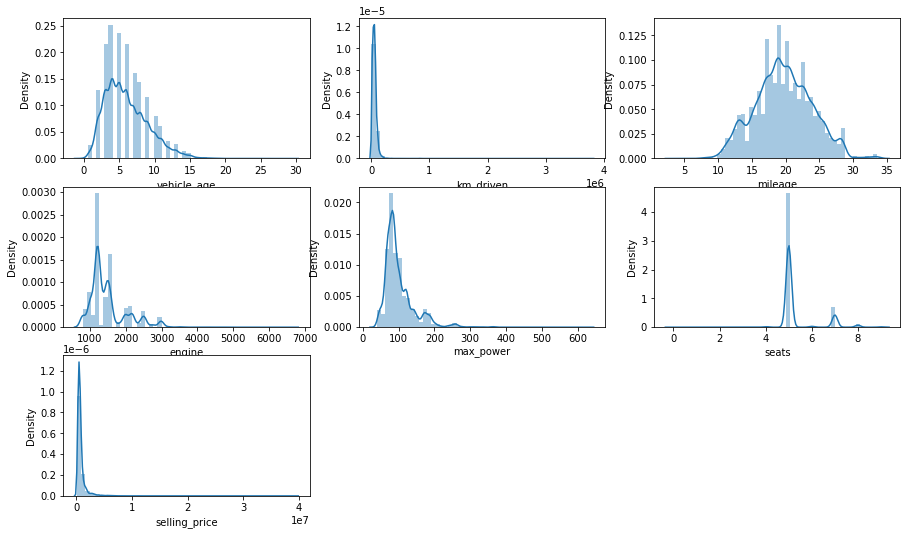

In [54]:
plt.figure(figsize=(15,15))
for i in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.distplot(df[numeric_features[i]])
    plt.xlabel(numeric_features[i])

# Categorical Features 

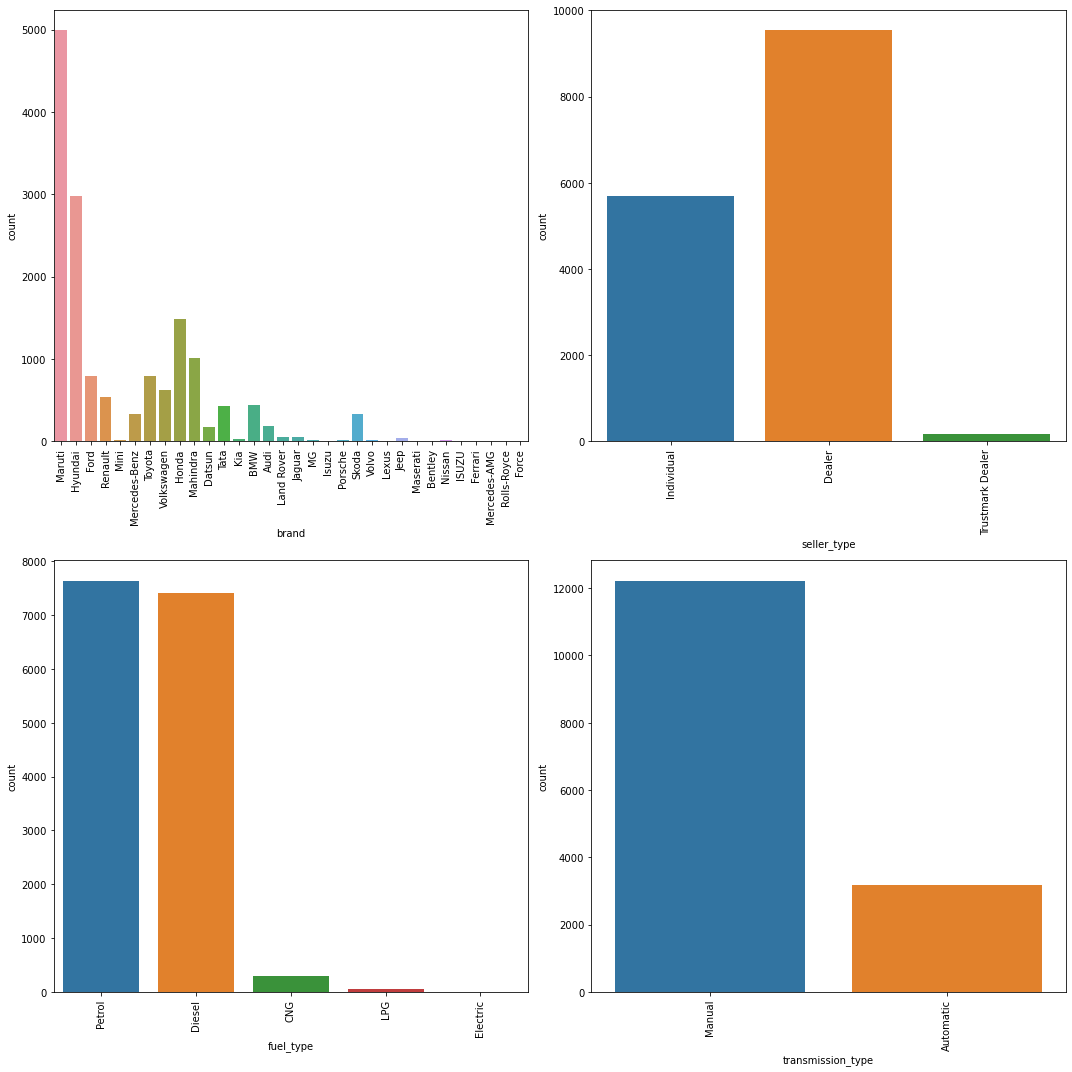

In [48]:
plt.figure(figsize=(15,15))
category = [ 'brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0,len(category)):
    plt.subplot(2,2,i+1)
    sns.countplot(df[category[i]])
    plt.xlabel(category[i])
    plt.xticks(rotation = 90)     #rotates the value name below the histograms
    plt.tight_layout()

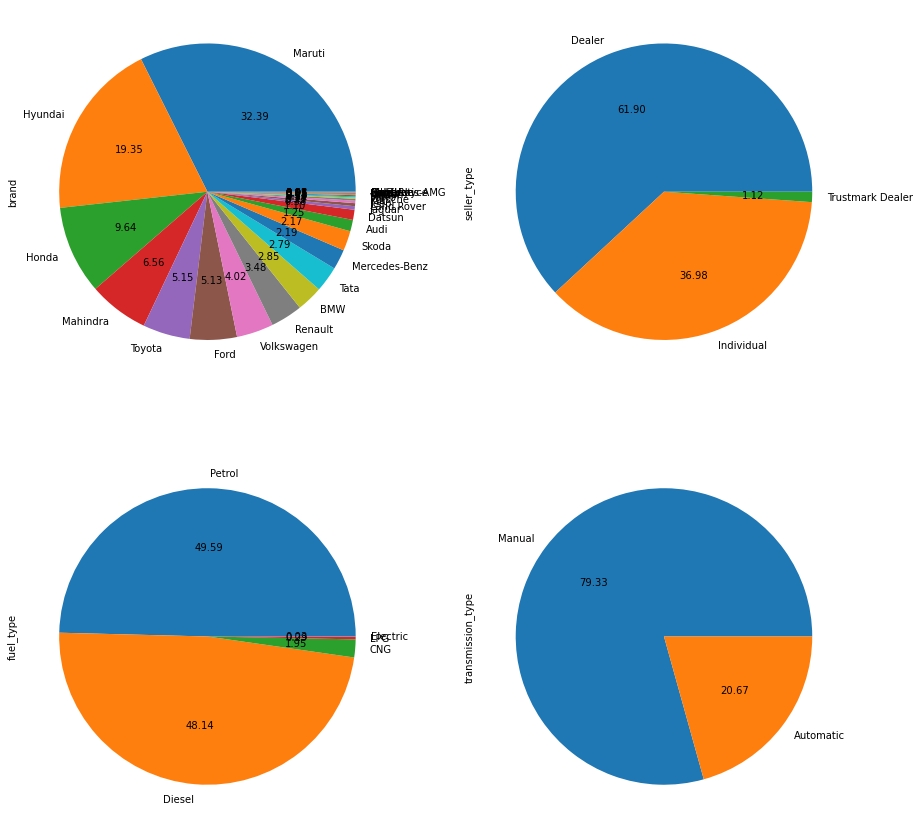

In [52]:
plt.figure(figsize=(15,15))
category = [ 'brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0,len(category)):
    plt.subplot(2,2,i+1)
    df[category[i]].value_counts().plot(kind = 'pie',autopct = '%.2f')
    plt.xticks(rotation = 90)

# Multivariate analysis

# Scatterplot (Numerical to Numerical)

Text(0.5, 1.0, 'Vehicle Age vs KM driven')

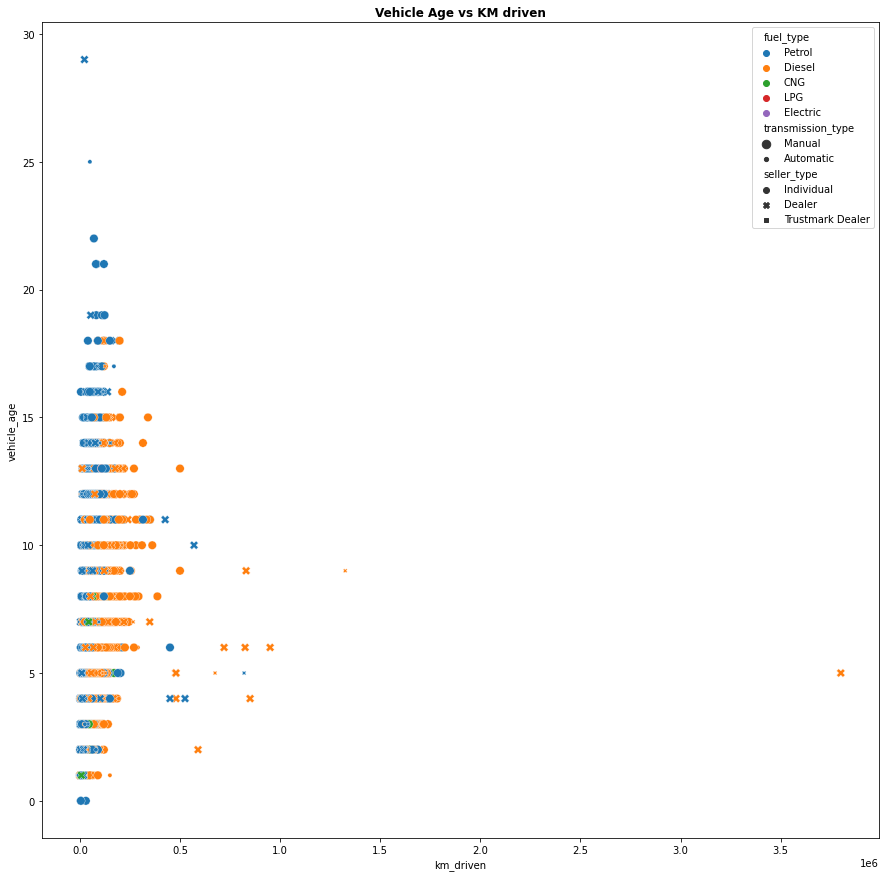

In [108]:
plt.figure(figsize=(15,15))
sns.scatterplot(df['km_driven'],df['vehicle_age'],hue=df['fuel_type'],style = df['seller_type'],size = df['transmission_type'])
plt.title("Vehicle Age vs KM driven",weight='bold')

We can do scatter plot of all numerical features against selling price

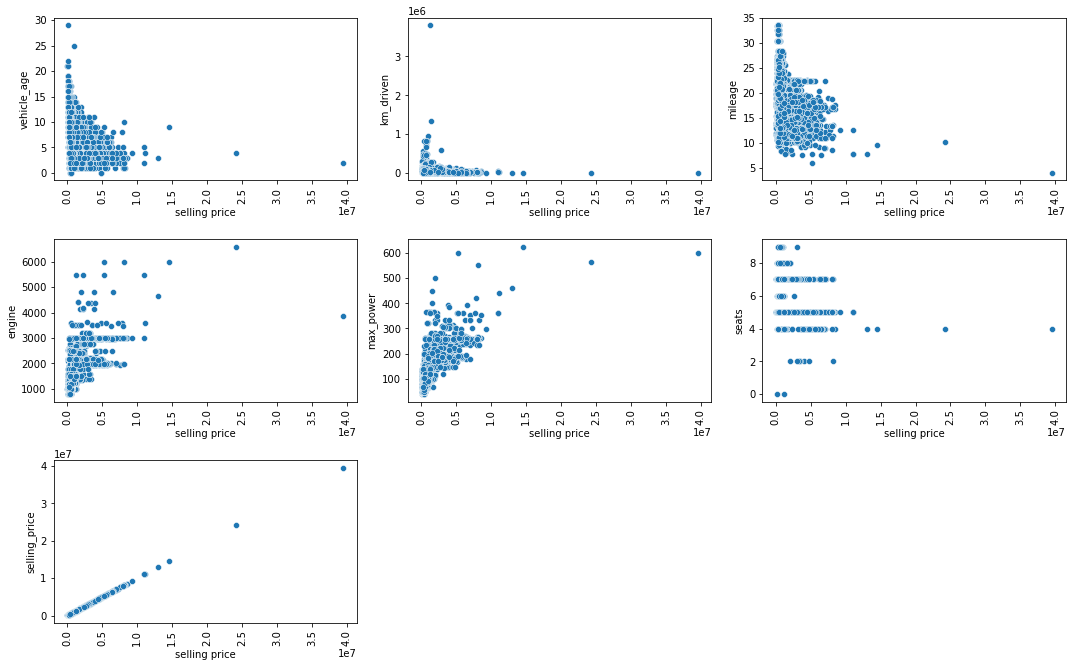

In [134]:
plt.figure(figsize=(15,15))
for i in range (0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(data = df, x = df['selling_price'], y = numeric_features[i])
    plt.xlabel('selling price')
    plt.xticks(rotation=90)
    plt.tight_layout()

# Barplot (Numerical to Categorical)
Generally we put categorical on x and numerical on y

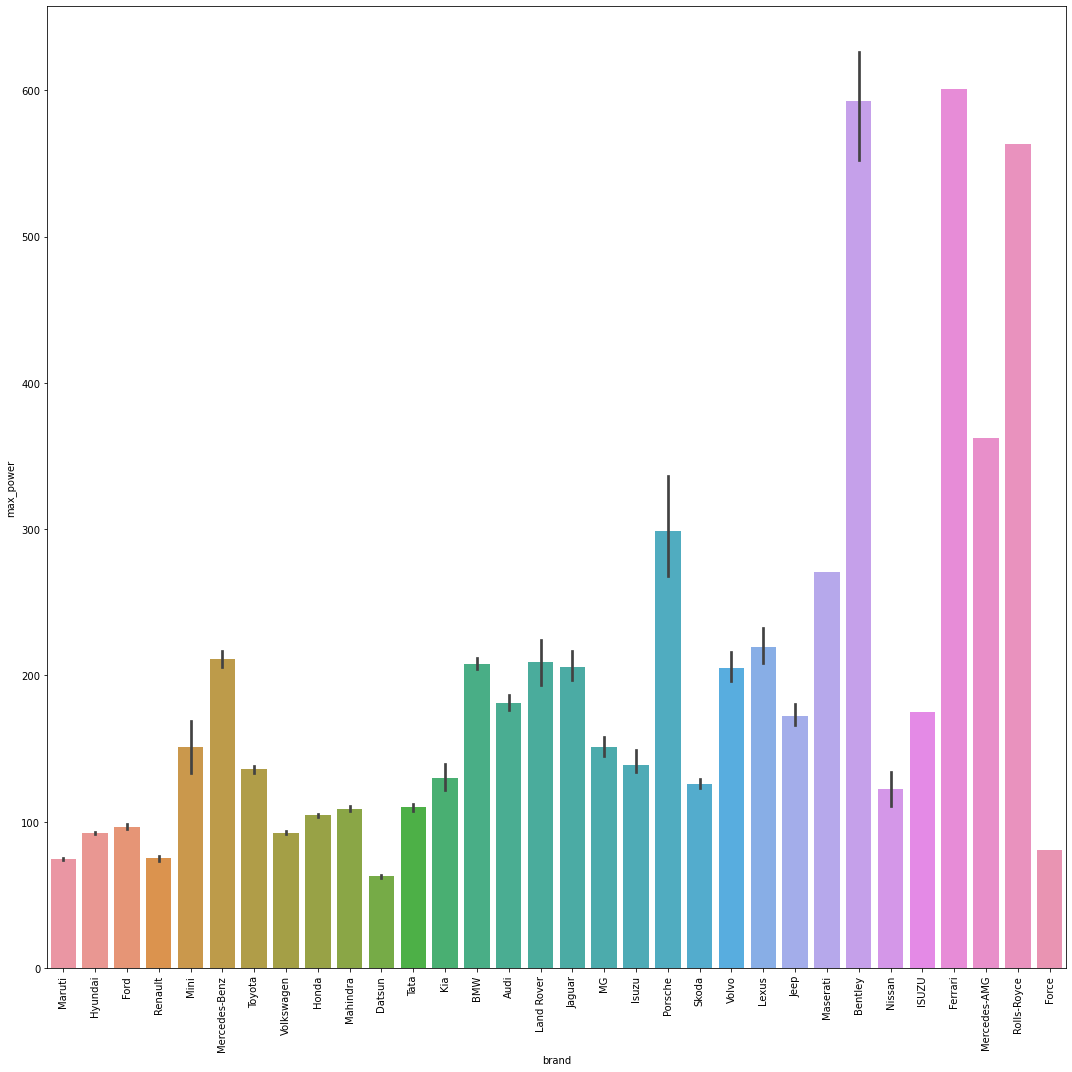

In [83]:
plt.figure(figsize=(15,15))
sns.barplot(df['brand'],df['max_power'])
plt.xticks(rotation = 90)
plt.tight_layout()

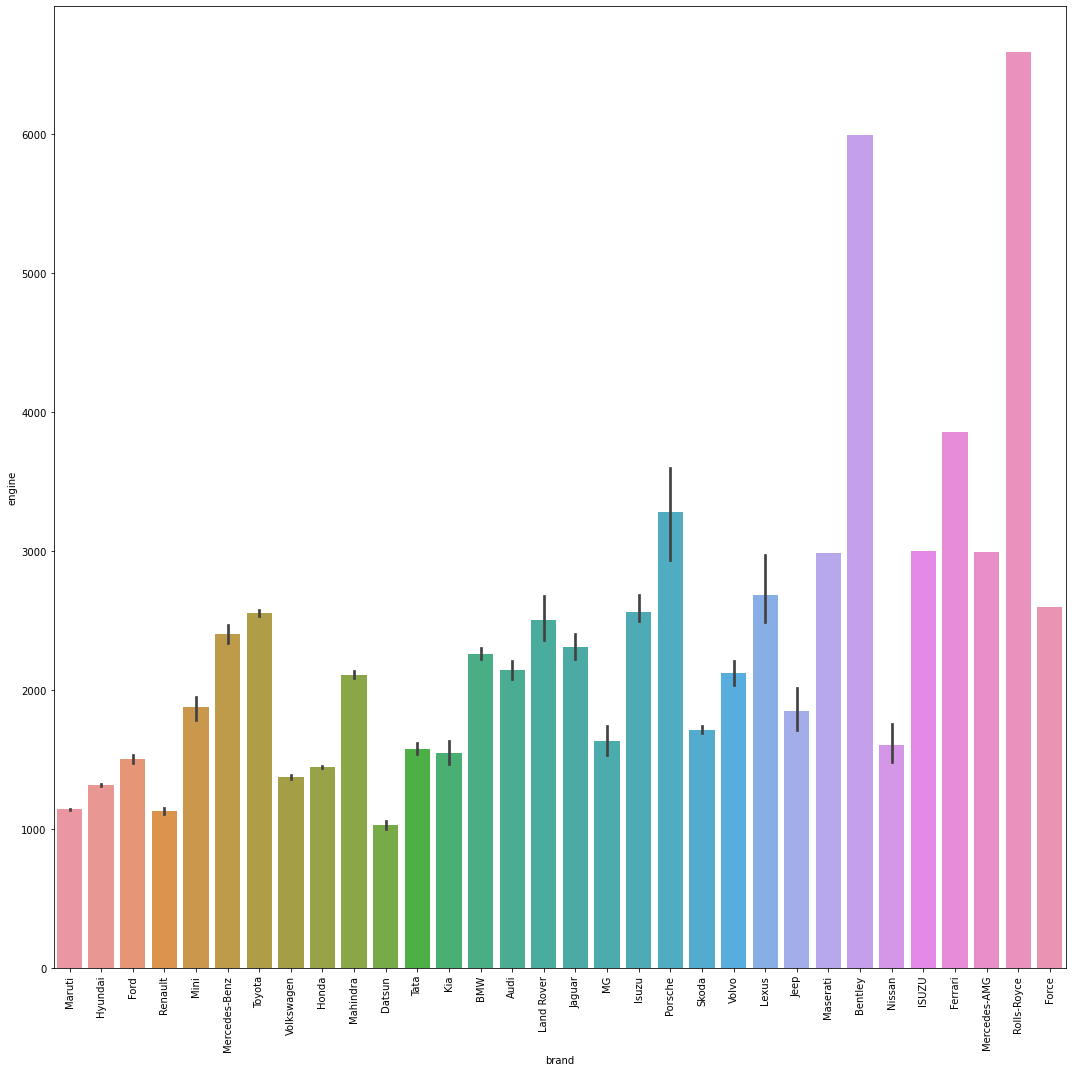

In [87]:
plt.figure(figsize = (15,15))
sns.barplot(df['brand'],df['engine'])
plt.xticks(rotation=90)
plt.tight_layout()

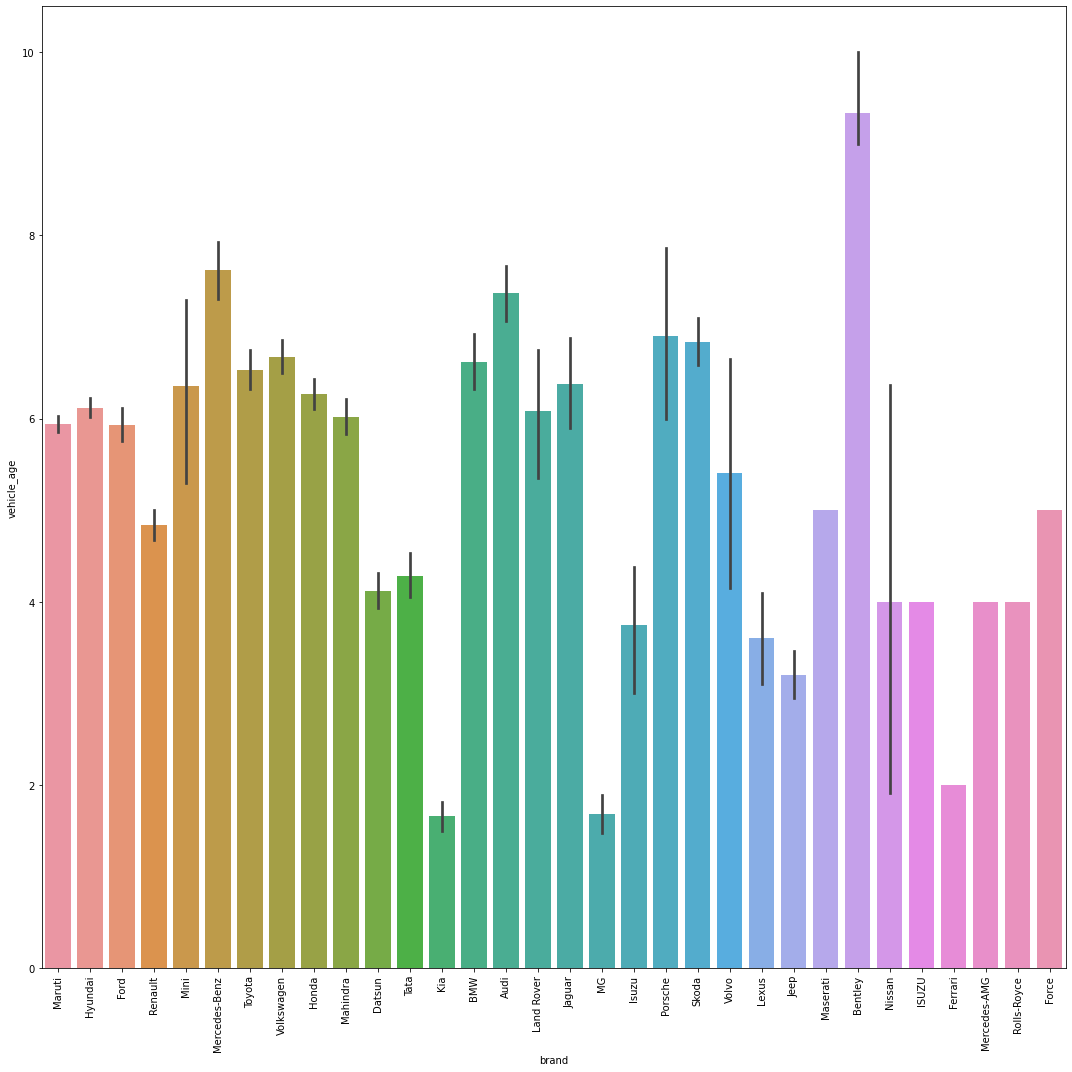

In [88]:
plt.figure(figsize = (15,15))
sns.barplot(df['brand'],df['vehicle_age'])
plt.xticks(rotation=90)
plt.tight_layout()

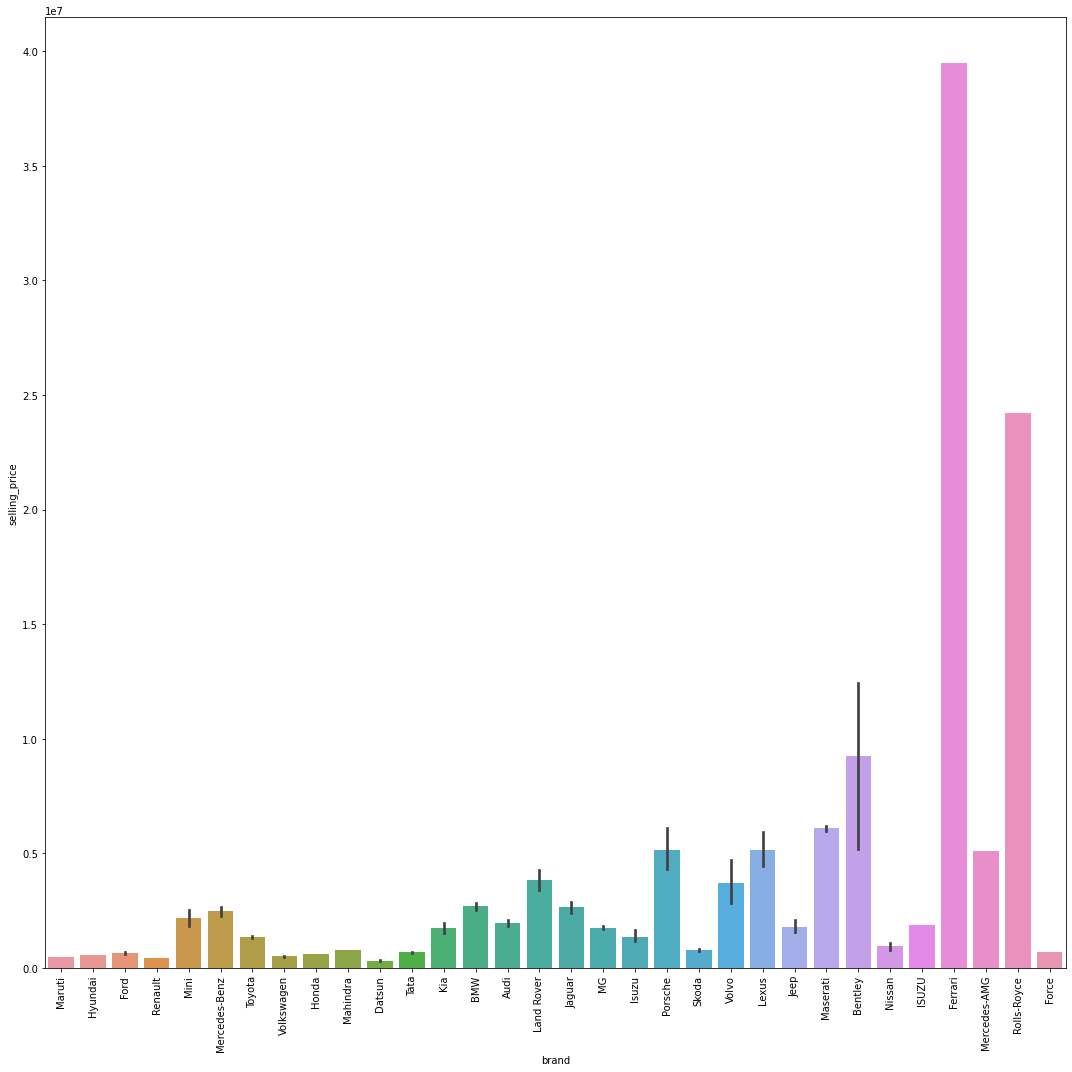

In [89]:
plt.figure(figsize = (15,15))
sns.barplot(df['brand'],df['selling_price'])
plt.xticks(rotation=90)
plt.tight_layout()

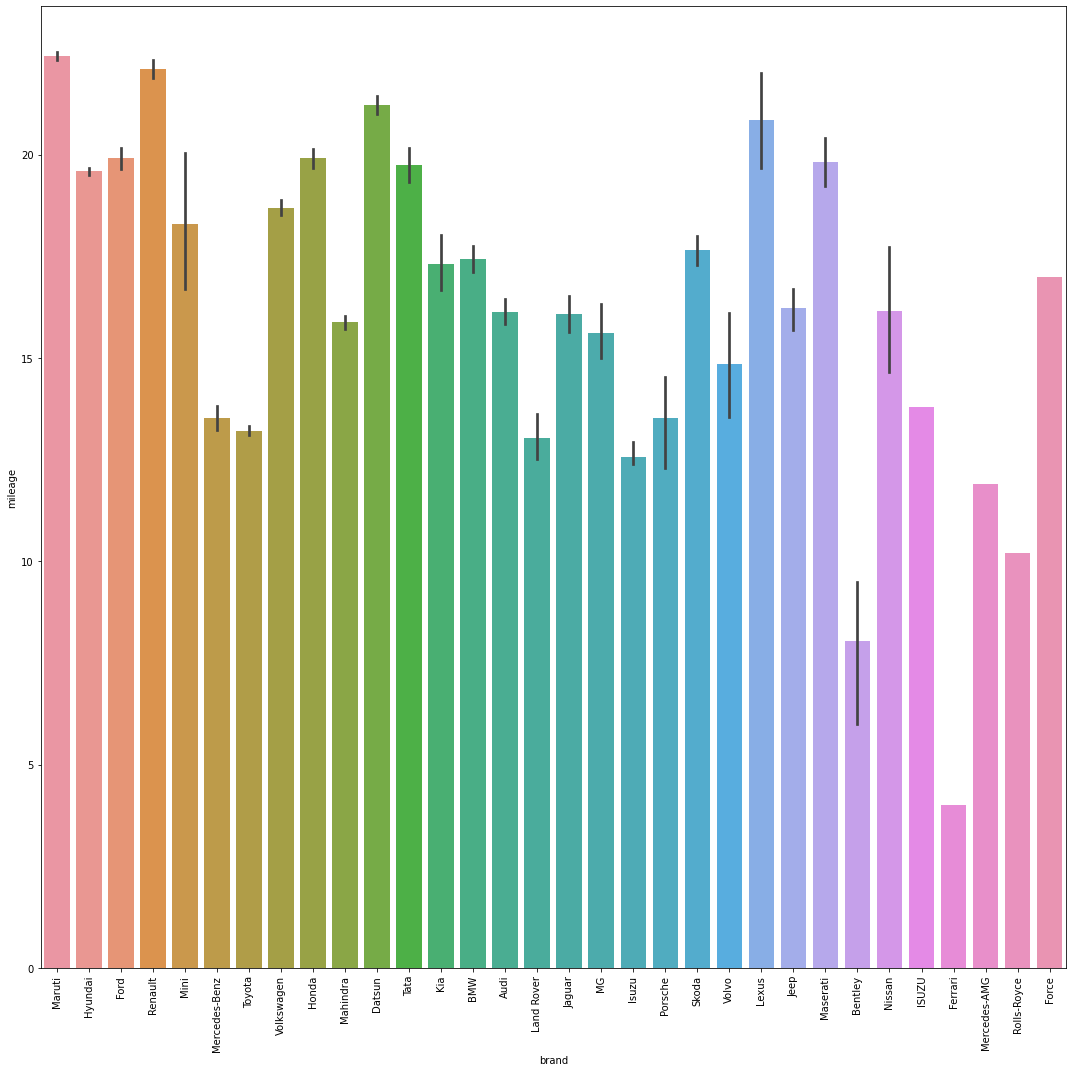

In [90]:
plt.figure(figsize = (15,15))
sns.barplot(df['brand'],df['mileage'])
plt.xticks(rotation=90)
plt.tight_layout()

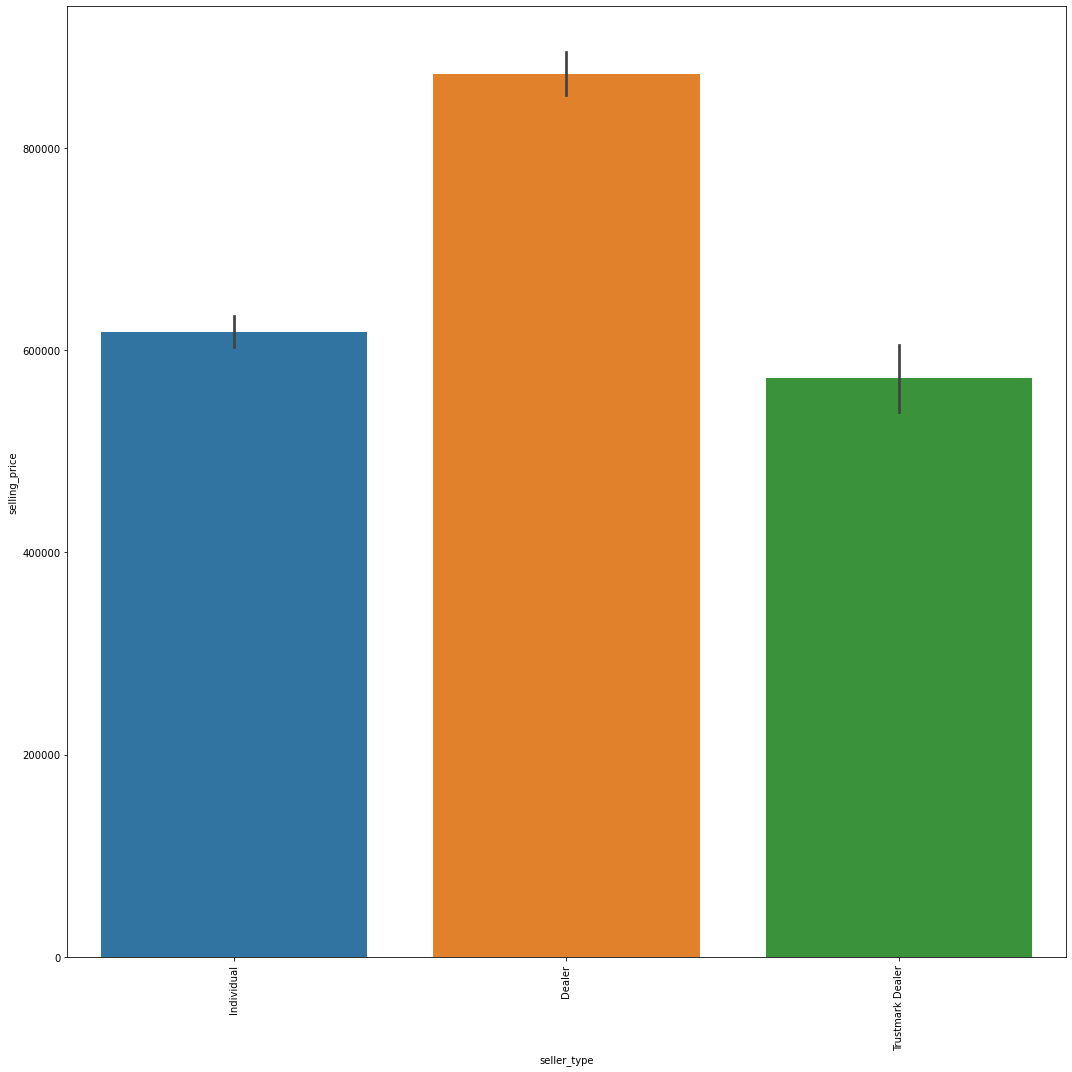

In [95]:
plt.figure(figsize=(15,15))
sns.barplot(df['seller_type'],df['selling_price'])
plt.xticks(rotation=90)
plt.tight_layout()

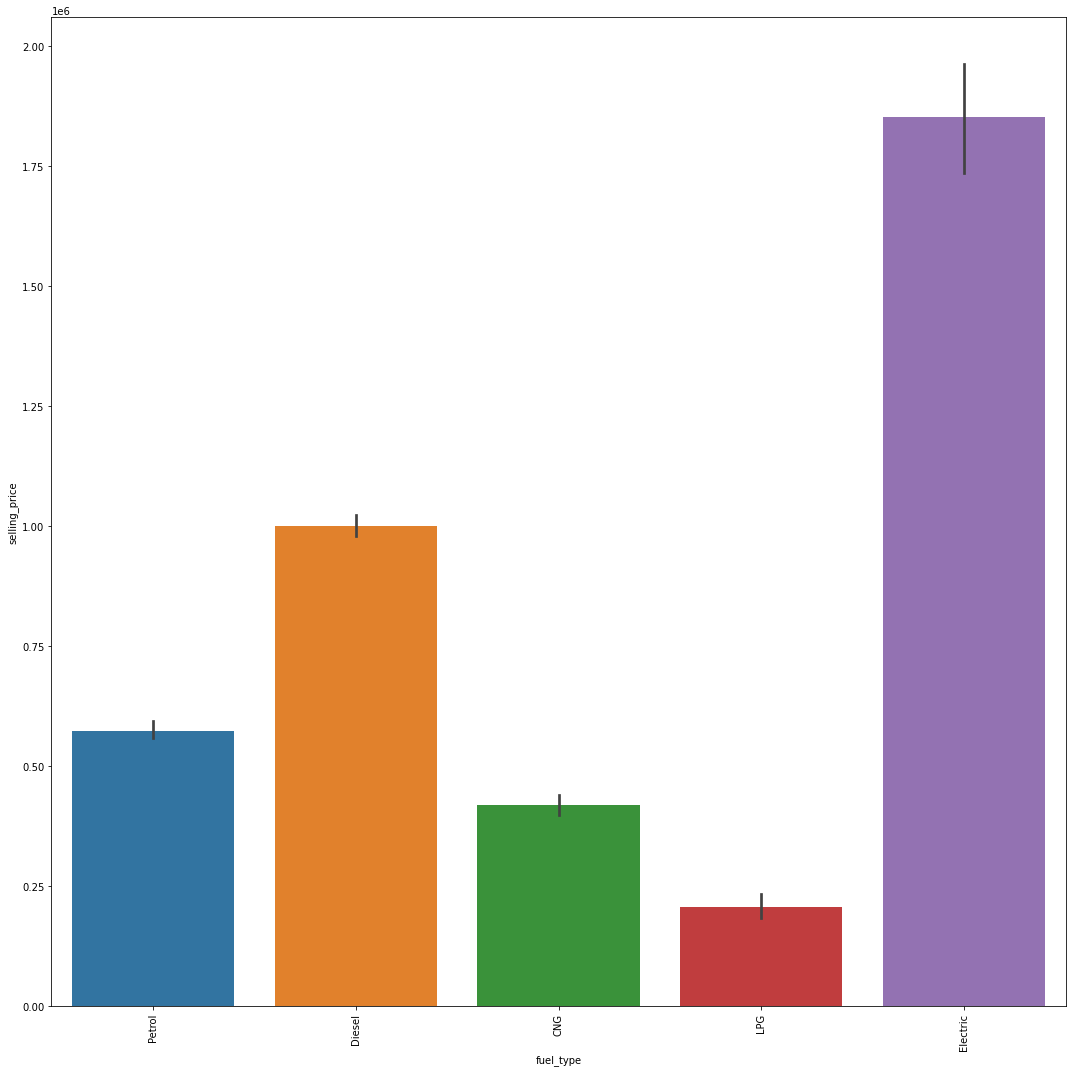

In [96]:
plt.figure(figsize=(15,15))
sns.barplot(df['fuel_type'],df['selling_price'])
plt.xticks(rotation=90)
plt.tight_layout()

# Boxplot (Numeric to Categoric)

In [91]:
numeric_features

['vehicle_age',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'selling_price']

In [92]:
categorical_features

['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

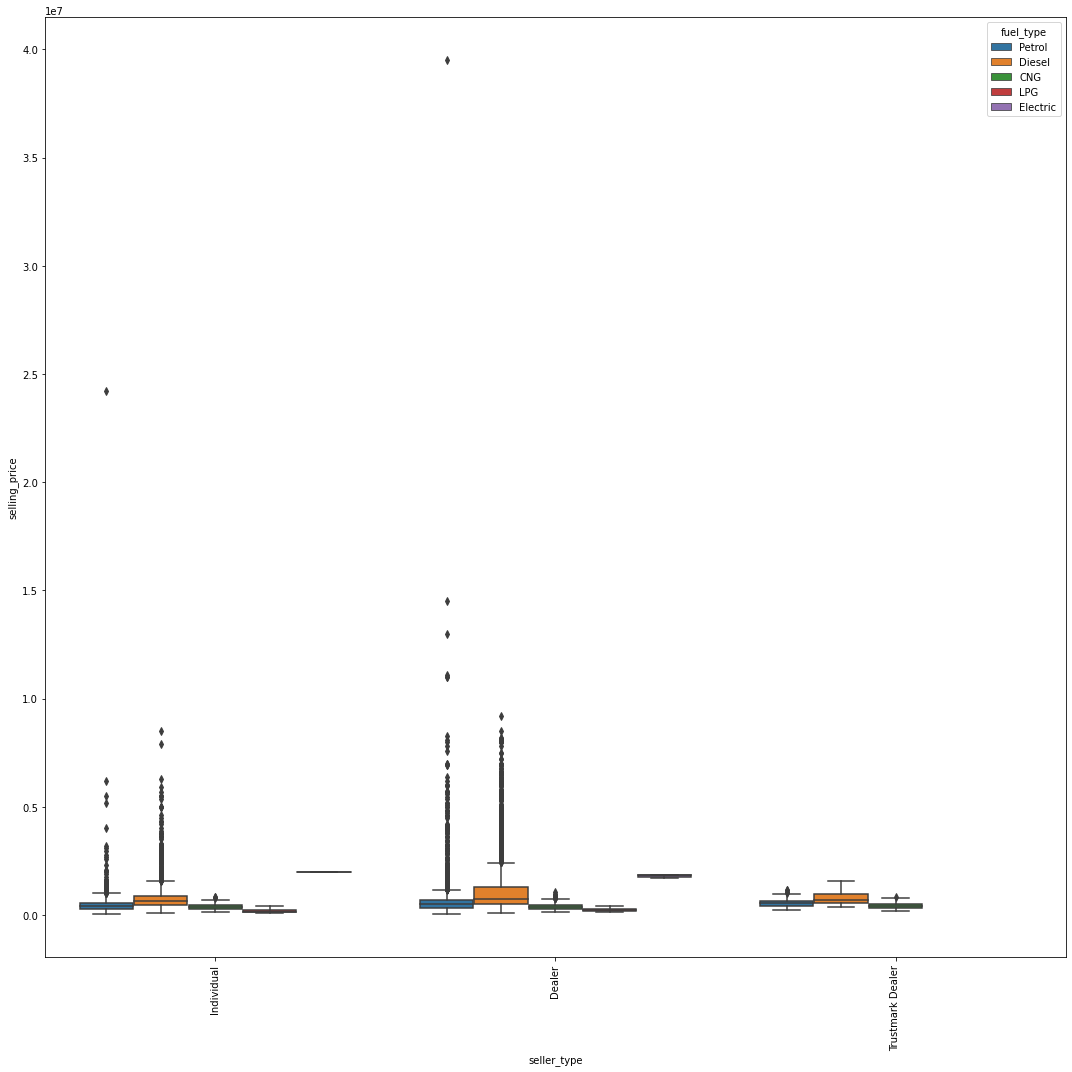

In [97]:
plt.figure(figsize = (15,15))
sns.boxplot(df['seller_type'],df['selling_price'],hue = df['fuel_type'])
plt.xticks(rotation=90)
plt.tight_layout()

# Heatmap 

Checking multicollinearity in numerical feature

In [115]:
df[list(df.columns[1:])].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


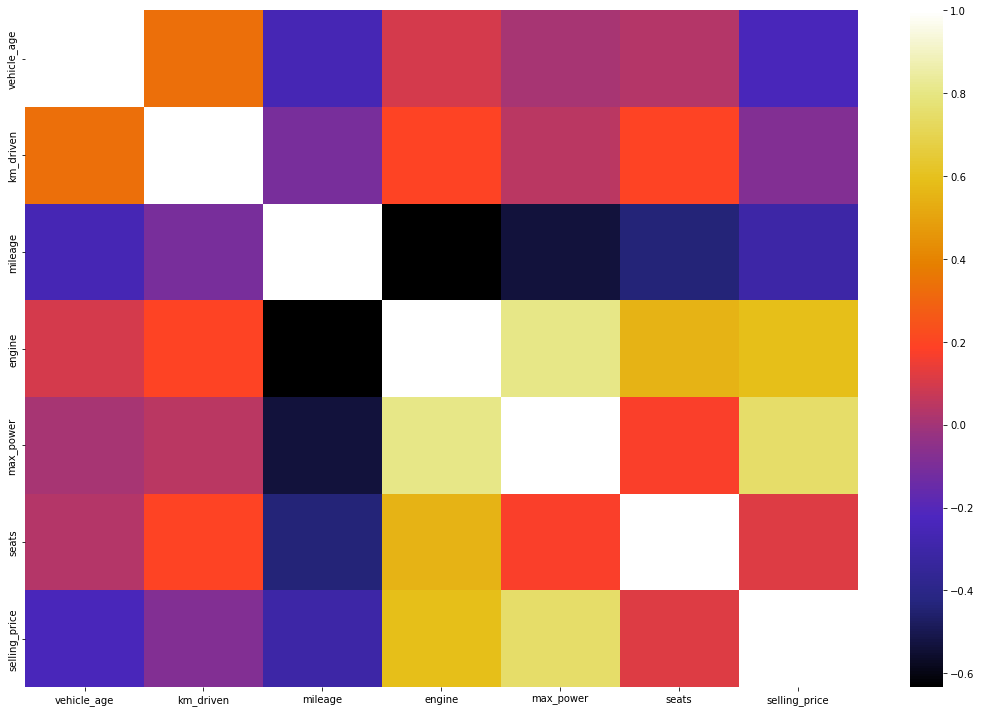

In [122]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap="CMRmap")
plt.tight_layout()

Now we will check multicollinearity of categorical features against selling price using chi square test

In [126]:
from scipy.stats import chi2_contingency
for feature in categorical_features:
    p_value = chi2_contingency(pd.crosstab(df['selling_price'],df[feature]))[1]
    if(p_value>0.05):
        print("We failed to reject null hypothesis ie, there is a relation between selling price and {}".format(feature))
    else:
        print("We reject the null hypothesis ie, there is no relation between selling price and {}".format(feature))

We reject the null hypothesis ie, there is no relation between selling price and car_name
We reject the null hypothesis ie, there is no relation between selling price and brand
We reject the null hypothesis ie, there is no relation between selling price and model
We reject the null hypothesis ie, there is no relation between selling price and seller_type
We reject the null hypothesis ie, there is no relation between selling price and fuel_type
We reject the null hypothesis ie, there is no relation between selling price and transmission_type
